<a href="https://colab.research.google.com/github/SUPERREALCODER/Environmental-inhibitor-/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#donloading all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import data_table
from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
#reading the initial datasheet with cost, toxicity and efficiency
url="https://raw.githubusercontent.com/SUPERREALCODER/Environmental-inhibitor-/main/AL_AA2024%20-%20Sheet1.csv"
data = pd.read_csv(url)



dt = data_table.DataTable(data)

display(dt)


,Unnamed: 0,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentrat_M,Efficiency,Cost/100 gm,Cost,Toxicity,Source
0,1,"1,2,4-Triazole",Al,AA2024,298,10.0,0.10,90.0,4861.8,https://www.sigmaaldrich.com/IN/en/product/ald...,"eye irritation ,fertility harm and harmful to ...",https://pubchem.ncbi.nlm.nih.gov/compound/1_2_...
1,2,"1,2,4-Triazole-3-thiol",Al,AA2024,298,4.0,0.10,90.0,3177,https://www.sigmaaldrich.com/IN/en/product/ald...,"allergic skin,eye irritation and toxic to aqua...","https://pubchem.ncbi.nlm.nih.gov/compound/1,2,..."
2,3,"1,2,4-Triazole-3-thiol",Al,AA2024,298,10.0,0.10,70.0,3177,https://www.sigmaaldrich.com/IN/en/product/ald...,"allergic skin,eye irritation and toxic to aqua...","https://pubchem.ncbi.nlm.nih.gov/compound/1,2,..."
3,4,"1H-Imidazo[4,5]pyrazine-2-thiol",Al,AA2024,298,4.0,0.10,50.0,502056,https://store.apolloscientific.co.uk/product/1...,"skin,eye and respiratory irritation",https://store.apolloscientific.co.uk/product/1...
4,5,2-Mercapto-5-methylbenzimidazole,Al,AA2024,298,4.0,0.10,80.0,"8,458.20",https://www.sigmaaldrich.com/IN/en/product/ald...,"skin,eye and respiratory irritation",https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...
...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,5-Chlorobenzotriazole,Al,AA2024,293,7.0,0.05,97.8,456.9,https://m.indiamart.com/proddetail/5-chloroben...,harmful if swallowed,https://pubchem.ncbi.nlm.nih.gov/compound/5-Ch...
339,340,Methyl 1-H-benzotriazole-1-carboxylate,Al,AA2024,293,7.0,0.05,96.4,309283,https://www.scbt.com/p/methyl-1h-benzotriazole...,"damaging to fertility ,and long lasting effect...",https://lanxess.com/-/media/Project/Lanxess/Co...
340,341,Methyl 1-H-benzotriazole-1-carboxylate,Al,AA2024,293,7.0,0.05,97.4,309283,https://www.scbt.com/p/methyl-1h-benzotriazole...,"damaging to fertility ,and long lasting effect...",https://lanxess.com/-/media/Project/Lanxess/Co...
341,342,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,293,7.0,0.05,99.4,2400,https://www.sigmaaldrich.com/IN/en/product/ald...,allergic skin reaction and toxic to aquatic li...,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...


In [ ]:

data1 = data.drop([5,19,20,21,22,23,24,25,26,31,32,33,34,35,40,41,51,91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334,259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 335, 336, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,29])
dt = data_table.DataTable(data1)
data2 = data1
display(dt)

,Unnamed: 0,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentrat_M,Efficiency,Cost/100 gm,Cost,Toxicity,Source
0,1,"1,2,4-Triazole",Al,AA2024,298,10.0,0.10,90.0,4861.8,https://www.sigmaaldrich.com/IN/en/product/ald...,"eye irritation ,fertility harm and harmful to ...",https://pubchem.ncbi.nlm.nih.gov/compound/1_2_...
1,2,"1,2,4-Triazole-3-thiol",Al,AA2024,298,4.0,0.10,90.0,3177,https://www.sigmaaldrich.com/IN/en/product/ald...,"allergic skin,eye irritation and toxic to aqua...","https://pubchem.ncbi.nlm.nih.gov/compound/1,2,..."
2,3,"1,2,4-Triazole-3-thiol",Al,AA2024,298,10.0,0.10,70.0,3177,https://www.sigmaaldrich.com/IN/en/product/ald...,"allergic skin,eye irritation and toxic to aqua...","https://pubchem.ncbi.nlm.nih.gov/compound/1,2,..."
3,4,"1H-Imidazo[4,5]pyrazine-2-thiol",Al,AA2024,298,4.0,0.10,50.0,502056,https://store.apolloscientific.co.uk/product/1...,"skin,eye and respiratory irritation",https://store.apolloscientific.co.uk/product/1...
4,5,2-Mercapto-5-methylbenzimidazole,Al,AA2024,298,4.0,0.10,80.0,"8,458.20",https://www.sigmaaldrich.com/IN/en/product/ald...,"skin,eye and respiratory irritation",https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...
...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,5-Chlorobenzotriazole,Al,AA2024,293,7.0,0.05,97.8,456.9,https://m.indiamart.com/proddetail/5-chloroben...,harmful if swallowed,https://pubchem.ncbi.nlm.nih.gov/compound/5-Ch...
339,340,Methyl 1-H-benzotriazole-1-carboxylate,Al,AA2024,293,7.0,0.05,96.4,309283,https://www.scbt.com/p/methyl-1h-benzotriazole...,"damaging to fertility ,and long lasting effect...",https://lanxess.com/-/media/Project/Lanxess/Co...
340,341,Methyl 1-H-benzotriazole-1-carboxylate,Al,AA2024,293,7.0,0.05,97.4,309283,https://www.scbt.com/p/methyl-1h-benzotriazole...,"damaging to fertility ,and long lasting effect...",https://lanxess.com/-/media/Project/Lanxess/Co...
341,342,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,293,7.0,0.05,99.4,2400,https://www.sigmaaldrich.com/IN/en/product/ald...,allergic skin reaction and toxic to aquatic li...,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...


mean 40258.23982954545
median 10000.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

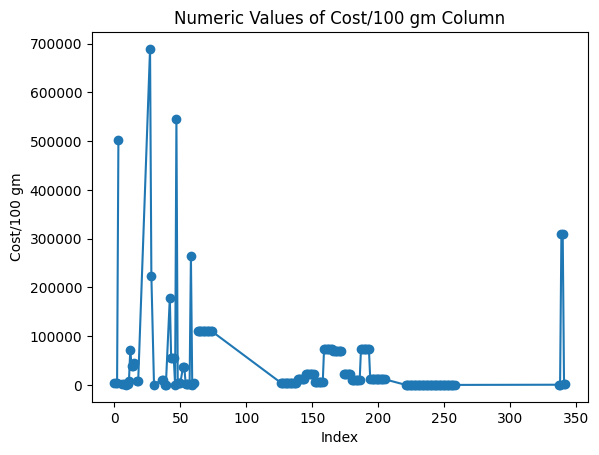

In [ ]:
#finding the mean and median of the cost
#plotting cost against specific index of the inhibitor
data1['Cost/100 gm'] = pd.to_numeric(data1['Cost/100 gm'], errors='coerce')
mean = data1['Cost/100 gm'].mean()
print("mean",mean)
median = data1['Cost/100 gm'].median()
print("median",median)
plt.plot(data1['Cost/100 gm'],marker='o')
plt.xlabel('Index')
plt.ylabel('Cost/100 gm')
plt.title('Numeric Values of Cost/100 gm Column')

plt.savefig('graph.jpg')
files.download('graph.jpg')

In [ ]:
#defining the the preprocess text function
url1="https://raw.githubusercontent.com/SUPERREALCODER/Environmental-inhibitor-/main/Copy%20of%20AL_AA2024%20for%20machine%20learning%20preprocessing%20-%20Sheet1.csv"
data_pre = pd.read_csv(url1)

def preprocess_text(text):
  #convert text to lowercase
  text = text.lower()

  #remove special characters and digits using regular expressions
  text = re.sub(r'\d+', '',text)#remove digits
  text = re.sub(r'[^\w\s]', '',text)#remove special characters
   #tokenize text
  tokens = nltk.word_tokenize(text)

  return(tokens)



In [ ]:
def remove_stopwords(tokens):
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in tokens if word.lower() not in stop_words ]
  return(filtered_tokens)




In [ ]:
#defining lemmatization function
def perform_lemmatzation(tokens):
  lemmatizer = nltk.WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return(lemmatized_tokens)


In [ ]:
#defining clean_text function

#calling all the funnction for text preprocessing of the toxicity column



def clean_text(text):
  tokens = preprocess_text(text)
  filtered_tokens = remove_stopwords(tokens)
  lemmatized_tokens = perform_lemmatzation(filtered_tokens)
  clean_text = ' '.join(lemmatized_tokens)
  return clean_text
for i in range(343):
  text1=data_pre['Toxicity'][i]
  if isinstance(text1, str):
    data_pre['Toxicity'][i]=clean_text(text1)



<ipython-input-15-30df1be4a54a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['Toxicity'][i]=clean_text(text1)
<ipython-input-15-30df1be4a54a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['Toxicity'][i]=clean_text(text1)
<ipython-input-15-30df1be4a54a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['Toxicity'][i]=clean_text(text1)
<ipython-input-15-30df1be4a54a>:10: SettingWithCopyWarning: 
A valu

'allergic skin reaction toxic aquatic life long lasting effect'

In [ ]:
#saving the datasheet after text processing to google drive
drive.mount('/content/drive')
d0 = pd.DataFrame(data_pre)
d0.to_csv('/content/drive/My Drive/mydata.csv', index=False)

In [ ]:
#dropping the columns for which the cost was not found
data_predrop = data_pre.drop([5,19,20,21,22,23,24,25,26,31,32,33,34,35,40,41,51,91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334])
df_pre = data_table.DataTable(data_predrop)
display(df_pre)

,Unnamed: 0,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentrat_M,Efficiency,Cost/100 gm,Cost,Toxicity,Source
0,1,"1,2,4-Triazole",Al,AA2024,298,10.0,0.10,90.0,4861.8,https://www.sigmaaldrich.com/IN/en/product/ald...,eye irritation fertility harm harmful aquatic ...,https://pubchem.ncbi.nlm.nih.gov/compound/1_2_...
1,2,"1,2,4-Triazole-3-thiol",Al,AA2024,298,4.0,0.10,90.0,3177,https://www.sigmaaldrich.com/IN/en/product/ald...,allergic skineye irritation toxic aquatic life...,"https://pubchem.ncbi.nlm.nih.gov/compound/1,2,..."
2,3,"1,2,4-Triazole-3-thiol",Al,AA2024,298,10.0,0.10,70.0,3177,https://www.sigmaaldrich.com/IN/en/product/ald...,allergic skineye irritation toxic aquatic life...,"https://pubchem.ncbi.nlm.nih.gov/compound/1,2,..."
3,4,"1H-Imidazo[4,5]pyrazine-2-thiol",Al,AA2024,298,4.0,0.10,50.0,502056,https://store.apolloscientific.co.uk/product/1...,skineye respiratory irritation,https://store.apolloscientific.co.uk/product/1...
4,5,2-Mercapto-5-methylbenzimidazole,Al,AA2024,298,4.0,0.10,80.0,"8,458.20",https://www.sigmaaldrich.com/IN/en/product/ald...,skineye respiratory irritation,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...
...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,5-Chlorobenzotriazole,Al,AA2024,293,7.0,0.05,97.8,456.9,https://m.indiamart.com/proddetail/5-chloroben...,harmful swallowed,https://pubchem.ncbi.nlm.nih.gov/compound/5-Ch...
339,340,Methyl 1-H-benzotriazole-1-carboxylate,Al,AA2024,293,7.0,0.05,96.4,309283,https://www.scbt.com/p/methyl-1h-benzotriazole...,damaging fertility long lasting effect aquatic...,https://lanxess.com/-/media/Project/Lanxess/Co...
340,341,Methyl 1-H-benzotriazole-1-carboxylate,Al,AA2024,293,7.0,0.05,97.4,309283,https://www.scbt.com/p/methyl-1h-benzotriazole...,damaging fertility long lasting effect aquatic...,https://lanxess.com/-/media/Project/Lanxess/Co...
341,342,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,293,7.0,0.05,99.4,2400,https://www.sigmaaldrich.com/IN/en/product/ald...,allergic skin reaction toxic aquatic life long...,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...


In [ ]:
#removing the empty errors of the data sheet
empty_values = data_predrop['Toxicity'].isna().sum()

print(empty_values)
data_predrop['Toxicity'][16] = "damaging fertility of unborn child and skin irritation"
print(data_predrop['Toxicity'][16] )

0
damaging fertility of unborn child and skin irritation


<ipython-input-10-3cdaa6e71e67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_predrop['Toxicity'][16] = "damaging fertility of unborn child and skin irritation"


In [ ]:
# finding modal toxicity class


# Select the column that you want to analyze
column = data_predrop['Toxicity']

# Create a Counter object to count the occurrences of each word
counts = Counter(column)

# Get the 3 most occurring words
most_occurring_words = counts.most_common(3)

# Print the results
print(most_occurring_words)

'''After that the inhibitor for which we have not found the cost we replace them by the median cost and the toxicity of the unfound is replaced by the modal class'''

[('eye damage toxic aquatic life long lasting effect', 39), ('harmful swallowed eye damage eye irritation', 38), ('skineye respiratory irritation', 23)]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

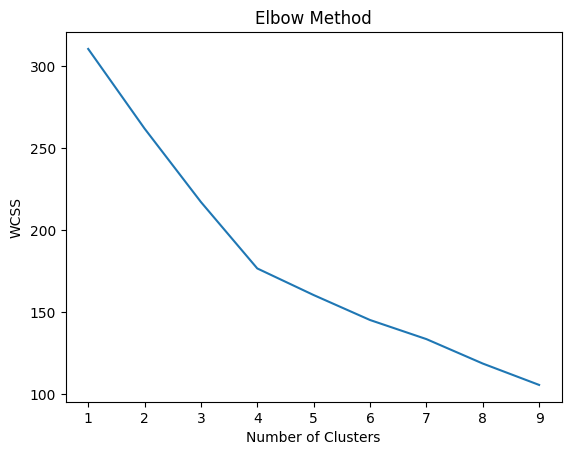

In [ ]:
# elbow method for finding the most optimal k value

# Read the CSV data sheet into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/SUPERREALCODER/Environmental-inhibitor-/main/adjusted%20data%20with%20median%20and%20mode%20-%20Sheet1.csv')

# Select the specific column to use
column = 'Toxicity'

# Perform one-hot encoding on the column
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_values = one_hot_encoder.fit_transform(df[[column]])

# Create a list of values for the number of clusters to try
k_range = range(1, 10)

# Create an empty list to store the WCSS values for each number of clusters
wcss = []

# Iterate over the list of k values, and for each value, fit a KMeans model to the data and calculate the WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(encoded_values)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_range, wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.savefig('elbow.jpg')
files.download('elbow.jpg')



In [ ]:
#performing the k-means with k=4  untill the covergence is acheived and plotting

# Read the CSV data sheet into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/SUPERREALCODER/Environmental-inhibitor-/main/adjusted%20data%20with%20median%20and%20mode%20-%20Sheet1.csv')

# Select the specific column to use
column = 'Toxicity'

# Perform one-hot encoding on the column
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_values = one_hot_encoder.fit_transform(df[[column]])

# Perform K-means clustering with k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(encoded_values)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['cluster_label'] = cluster_labels

# Plot the clusters using a scatter plot
plt.figure(figsize=(8, 6))
for cluster_label in range(4):  # Update the range to 4 for k=4 clusters
    cluster_data = df[df['cluster_label'] == cluster_label]
    plt.scatter(cluster_data.index, cluster_data[column], label=f'Cluster {cluster_label}')

plt.title('K-means Clustering')
plt.xlabel('Index')
plt.ylabel(column)
plt.legend()
plt.grid(False)
plt.show()



In [ ]:
#perfoming the clustering

# Read the CSV data sheet into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/SUPERREALCODER/Environmental-inhibitor-/main/adjusted%20data%20with%20median%20and%20mode%20-%20Sheet1.csv')

# Select the specific column to use
column = 'Toxicity'

# Perform one-hot encoding on the column
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_values = one_hot_encoder.fit_transform(df[[column]])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(encoded_values)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['cluster_label'] = cluster_labels

# Plot the clusters (you may need to adapt this part based on your specific use case)
# For example, you can plot the clusters using a scatter plot or any other suitable visualization method

# Save the clustered data to a CSV file
df.to_csv('clustered_data.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#reading the clustered_data.csv
clustered_data = pd.read_csv('clustered_data.csv')
df_cluster = data_table.DataTable(clustered_data)
display(df_cluster)

,Unnamed: 0,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentrat_M,Efficiency,Cost/100 gm,Cost,Toxicity,Source,cluster_label
0,1,"1,2,4-Triazole",Al,AA2024,298,10.0,0.10,90.0,4861.8,https://www.sigmaaldrich.com/IN/en/product/ald...,eye irritation fertility harm harmful aquatic ...,https://pubchem.ncbi.nlm.nih.gov/compound/1_2_...,1
1,2,"1,2,4-Triazole-3-thiol",Al,AA2024,298,4.0,0.10,90.0,3177,https://www.sigmaaldrich.com/IN/en/product/ald...,allergic skineye irritation toxic aquatic life...,"https://pubchem.ncbi.nlm.nih.gov/compound/1,2,...",1
2,3,"1,2,4-Triazole-3-thiol",Al,AA2024,298,10.0,0.10,70.0,3177,https://www.sigmaaldrich.com/IN/en/product/ald...,allergic skineye irritation toxic aquatic life...,"https://pubchem.ncbi.nlm.nih.gov/compound/1,2,...",1
3,4,"1H-Imidazo[4,5]pyrazine-2-thiol",Al,AA2024,298,4.0,0.10,50.0,502056,https://store.apolloscientific.co.uk/product/1...,skineye respiratory irritation,https://store.apolloscientific.co.uk/product/1...,0
4,5,2-Mercapto-5-methylbenzimidazole,Al,AA2024,298,4.0,0.10,80.0,"8,458.20",https://www.sigmaaldrich.com/IN/en/product/ald...,skineye respiratory irritation,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,339,5-Chlorobenzotriazole,Al,AA2024,293,7.0,0.05,97.8,456.9,https://m.indiamart.com/proddetail/5-chloroben...,harmful swallowed,https://pubchem.ncbi.nlm.nih.gov/compound/5-Ch...,2
235,340,Methyl 1-H-benzotriazole-1-carboxylate,Al,AA2024,293,7.0,0.05,96.4,309283,https://www.scbt.com/p/methyl-1h-benzotriazole...,damaging fertility long lasting effect aquatic...,https://lanxess.com/-/media/Project/Lanxess/Co...,1
236,341,Methyl 1-H-benzotriazole-1-carboxylate,Al,AA2024,293,7.0,0.05,97.4,309283,https://www.scbt.com/p/methyl-1h-benzotriazole...,damaging fertility long lasting effect aquatic...,https://lanxess.com/-/media/Project/Lanxess/Co...,1
237,342,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,293,7.0,0.05,99.4,2400,https://www.sigmaaldrich.com/IN/en/product/ald...,allergic skin reaction toxic aquatic life long...,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1


In [ ]:
#saing clustered data to google drive
drive.mount('/content/drive')
d0 = pd.DataFrame(clustered_data)
d0.to_csv('/content/drive/My Drive/mydata.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#performing the k-means clustering again to acheive convergence


column = clustered_data['Toxicity']

# Encode the 'Toxicity' column using LabelEncoder
le = LabelEncoder()
column_encoded = le.fit_transform(column)
column_encoded = column_encoded.reshape(-1, 1)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(column_encoded)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
clustered_data['cluster_label'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(8,6))
for cluster_label in range(4):
    cluster_data1 = clustered_data[clustered_data['cluster_label'] == cluster_label]
    plt.scatter(cluster_data1.index, cluster_data1['Toxicity'], label=f'Cluster {cluster_label}')

plt.title('K-means Clustering of Toxicity Data')
plt.xlabel('Index')
plt.ylabel('Inhibitor')
plt.legend()
plt.grid(False)
plt.show()

# Save the clustered data to a CSV file
clustered_data.to_csv('clustered_data1.csv', index=False)


In [ ]:
#saving the clustered_data1 to google drive
clustered_data1 = pd.read_csv('clustered_data1.csv')
df_cluster = data_table.DataTable(clustered_data1)
display(df_cluster)

,Unnamed: 0,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentrat_M,Efficiency,Cost/100 gm,Cost,Toxicity,Source,cluster_label
0,1,"1,2,4-Triazole",Al,AA2024,298,10.0,0.10,90.0,4861.8,https://www.sigmaaldrich.com/IN/en/product/ald...,"eye irritation ,fertility harm and harmful to ...",https://pubchem.ncbi.nlm.nih.gov/compound/1_2_...,0
1,2,"1,2,4-Triazole-3-thiol",Al,AA2024,298,4.0,0.10,90.0,3177,https://www.sigmaaldrich.com/IN/en/product/ald...,"allergic skin,eye irritation and toxic to aqua...","https://pubchem.ncbi.nlm.nih.gov/compound/1,2,...",3
2,3,"1,2,4-Triazole-3-thiol",Al,AA2024,298,10.0,0.10,70.0,3177,https://www.sigmaaldrich.com/IN/en/product/ald...,"allergic skin,eye irritation and toxic to aqua...","https://pubchem.ncbi.nlm.nih.gov/compound/1,2,...",3
3,4,"1H-Imidazo[4,5]pyrazine-2-thiol",Al,AA2024,298,4.0,0.10,50.0,502056,https://store.apolloscientific.co.uk/product/1...,"skin,eye and respiratory irritation",https://store.apolloscientific.co.uk/product/1...,1
4,5,2-Mercapto-5-methylbenzimidazole,Al,AA2024,298,4.0,0.10,80.0,"8,458.20",https://www.sigmaaldrich.com/IN/en/product/ald...,"skin,eye and respiratory irritation",https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,5-Chlorobenzotriazole,Al,AA2024,293,7.0,0.05,97.8,456.9,https://m.indiamart.com/proddetail/5-chloroben...,harmful if swallowed,https://pubchem.ncbi.nlm.nih.gov/compound/5-Ch...,2
339,340,Methyl 1-H-benzotriazole-1-carboxylate,Al,AA2024,293,7.0,0.05,96.4,309283,https://www.scbt.com/p/methyl-1h-benzotriazole...,"damaging to fertility ,and long lasting effect...",https://lanxess.com/-/media/Project/Lanxess/Co...,0
340,341,Methyl 1-H-benzotriazole-1-carboxylate,Al,AA2024,293,7.0,0.05,97.4,309283,https://www.scbt.com/p/methyl-1h-benzotriazole...,"damaging to fertility ,and long lasting effect...",https://lanxess.com/-/media/Project/Lanxess/Co...,0
341,342,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",Al,AA2024,293,7.0,0.05,99.4,2400,https://www.sigmaaldrich.com/IN/en/product/ald...,allergic skin reaction and toxic to aquatic li...,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,3


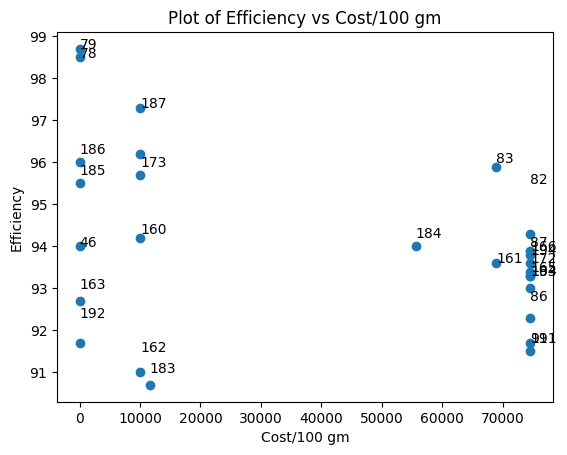

In [ ]:
'''we determine the best environment friendly cluster out of the 4
clusters and plot the efficiency cost graph of the inhibitors of that cluster '''
#plotting the  efficiency cost graph of most environment friendly cluster

# Read the CSV file into a Pandas DataFrame
d_plot = pd.read_csv('https://raw.githubusercontent.com/SUPERREALCODER/Environmental-inhibitor-/main/90%20converged%20updated%20-%20Sheet1.csv')
d_plot = d_plot.drop([3])
# Select the two columns that you want to plot
d_plot['Cost/100 gm'] = d_plot['Cost/100 gm'].astype(str)

d_plot['Cost/100 gm']=pd.to_numeric(d_plot['Cost/100 gm'])
d_plot['Efficiency']=pd.to_numeric(d_plot['Efficiency'])
x = d_plot['Cost/100 gm']
y = d_plot['Efficiency']

# Create a scatter plot
plt.scatter(x, y)

# Add the specific marked index on each point
for i, point in enumerate(x):
  if i!=3:
     plt.text(point, y[i], str(d_plot['Unnamed: 0'][i]))

# Set the title and labels of the plot
plt.title('Plot of Efficiency vs Cost/100 gm')
plt.xlabel('Cost/100 gm')
plt.ylabel('Efficiency')

# Display the plot
plt.show()

In [ ]:
#displaying the dataheet to see the index of the outliers
dt = data_table.DataTable(d_plot)

display(dt)

,Unnamed: 0,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentrat_M,Efficiency,Cost/100 gm,Cost,Toxicity,Source,cluster_label
1,5,2-Mercapto-5-methylbenzimidazole,Al,AA2024,298,4,0.10,80.00,8458.20,https://www.sigmaaldrich.com/IN/en/product/ald...,"skin,eye and respiratory irritation",https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1
2,10,Thiosalicylic acid / 2-Sulfanylbenzoic acid / ...,Al,AA2024,298,7,0.10,88.00,250.00,https://m.indiamart.com/proddetail/thiosalicyl...,skin and eye irritation,https://sdfine.com/coa/56472MSDS.pdf,1
3,12,2-Mercaptonicotinic acid,Al,AA2024,298,7,0.10,83.00,8762.25,https://www.chemicalbook.com/ChemicalProductPr...,skin and eye irritation,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1
4,13,2-Mercaptopyrimidine,Al,AA2024,298,7,0.10,89.00,71373.00,https://www.sigmaaldrich.com/IN/en/product/ald...,"skin and eye irritation, and may cause respira...",https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1
5,18,"3-Amino-1,2,4-triazole",Al,AA2024,298,4,0.10,70.00,7958.70,https://www.sigmaaldrich.com/IN/en/product/sig...,"toxic to aquatic life ,long lasting effects ,d...",https://www.sigmaaldrich.com/IN/en/sds/sigma/a...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,202,Cerium (III) chloride,Al,AA2024,293,7,0.01,87.48,11594.70,https://www.sigmaaldrich.com/IN/en/product/ald...,"skin burn,eye damage and toxic to aquatic life...",https://www.sigmaaldrich.com/IN/en/sds/ALDRICH...,1
68,203,Cerium (III) chloride,Al,AA2024,293,7,0.01,89.79,11594.70,https://www.sigmaaldrich.com/IN/en/product/ald...,"skin burn,eye damage and toxic to aquatic life...",https://www.sigmaaldrich.com/IN/en/sds/ALDRICH...,1
69,204,Cerium (III) chloride,Al,AA2024,313,7,0.01,70.62,11594.70,https://www.sigmaaldrich.com/IN/en/product/ald...,"skin burn,eye damage and toxic to aquatic life...",https://www.sigmaaldrich.com/IN/en/sds/ALDRICH...,1
70,205,Cerium (III) chloride,Al,AA2024,313,7,0.01,85.30,11594.70,https://www.sigmaaldrich.com/IN/en/product/ald...,"skin burn,eye damage and toxic to aquatic life...",https://www.sigmaaldrich.com/IN/en/sds/ALDRICH...,1


In [ ]:
df_zoom = pd.read_csv('https://raw.githubusercontent.com/SUPERREALCODER/Environmental-inhibitor-/main/1%20cluster%20data%20sheet%20-%20Sheet1.csv')
df_zoom.head()

,Unnamed: 0,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentrat_M,Efficiency,Cost/100 gm,Cost,Toxicity,Source,cluster_label
0,4,"1H-Imidazo[4,5]pyrazine-2-thiol",Al,AA2024,298,4,0.1,50.0,502056,https://store.apolloscientific.co.uk/product/1...,skineye respiratory irritation,https://store.apolloscientific.co.uk/product/1...,1
1,5,2-Mercapto-5-methylbenzimidazole,Al,AA2024,298,4,0.1,80.0,"8,458.20",https://www.sigmaaldrich.com/IN/en/product/ald...,skineye respiratory irritation,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1
2,10,Thiosalicylic acid / 2-Sulfanylbenzoic acid / ...,Al,AA2024,298,7,0.1,88.0,250,https://m.indiamart.com/proddetail/thiosalicyl...,skin eye irritation,https://sdfine.com/coa/56472MSDS.pdf,1
3,12,2-Mercaptonicotinic acid,Al,AA2024,298,7,0.1,83.0,8762.25,https://www.chemicalbook.com/ChemicalProductPr...,skin eye irritation,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1
4,13,2-Mercaptopyrimidine,Al,AA2024,298,7,0.1,89.0,71373,https://www.sigmaaldrich.com/IN/en/product/ald...,skin eye irritation may cause respiratory irri...,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1


In [ ]:
#dropping the outliers
df_zoom = df_zoom.drop([0,6,8])
df_zoom.head()


,Unnamed: 0,Inhibitor,Metal,Alloy,Temperature_K,pH,Salt_Concentrat_M,Efficiency,Cost/100 gm,Cost,Toxicity,Source,cluster_label
1,5,2-Mercapto-5-methylbenzimidazole,Al,AA2024,298,4,0.1,80.0,"8,458.20",https://www.sigmaaldrich.com/IN/en/product/ald...,skineye respiratory irritation,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1
2,10,Thiosalicylic acid / 2-Sulfanylbenzoic acid / ...,Al,AA2024,298,7,0.1,88.0,250,https://m.indiamart.com/proddetail/thiosalicyl...,skin eye irritation,https://sdfine.com/coa/56472MSDS.pdf,1
3,12,2-Mercaptonicotinic acid,Al,AA2024,298,7,0.1,83.0,8762.25,https://www.chemicalbook.com/ChemicalProductPr...,skin eye irritation,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1
4,13,2-Mercaptopyrimidine,Al,AA2024,298,7,0.1,89.0,71373,https://www.sigmaaldrich.com/IN/en/product/ald...,skin eye irritation may cause respiratory irri...,https://pubchem.ncbi.nlm.nih.gov/compound/2-Me...,1
5,18,"3-Amino-1,2,4-triazole",Al,AA2024,298,4,0.1,70.0,7958.7,https://www.sigmaaldrich.com/IN/en/product/sig...,toxic aquatic life long lasting effect disorde...,https://www.sigmaaldrich.com/IN/en/sds/sigma/a...,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

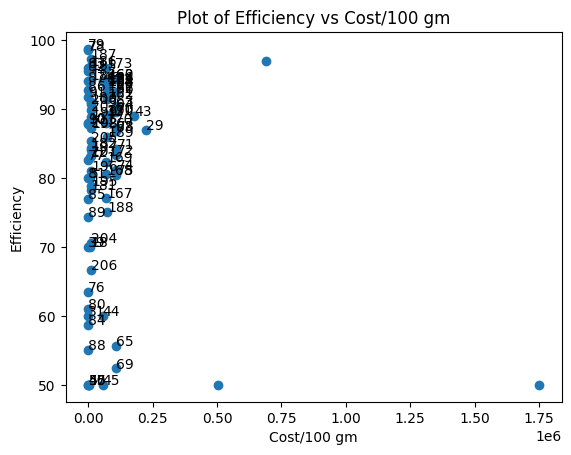

In [ ]:
#plotting after removing the outliers
df_zoom['Cost/100 gm'] = df_zoom['Cost/100 gm'].str.replace(',', '')

df_zoom['Cost/100 gm']=pd.to_numeric(df_zoom['Cost/100 gm'])
df_zoom['Efficiency']=pd.to_numeric(df_zoom['Efficiency'])
x = df_zoom['Cost/100 gm']
y = df_zoom['Efficiency']

# Create a scatter plot
plt.scatter(x, y)

# Add the specific marked index on each point
for i, point in enumerate(x):
    if i!=0 and i!=6 and i!=8:
      plt.text(point, y[i], str(df_zoom['Unnamed: 0'][i]))

# Set the title and labels of the plot
plt.title('Plot of Efficiency vs Cost/100 gm')
plt.xlabel('Cost/100 gm')
plt.ylabel('Efficiency')

# Display the plot
plt.savefig('original.jpg')
files.download('original.jpg')